In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [5]:
#81 How many patients in ICU are sent home

df = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
df1 = df[(df['DischargeDisposition']=='Home')&(df['Service']=='ICU')]
tot = (df['Service']=='ICU').count()
cnt = df1.count()
print('Total number of patients in ICU:',tot)
print('Number of patients in ICU sent home:',cnt[0])

Total number of patients in ICU: 720
Number of patients in ICU sent home: 110


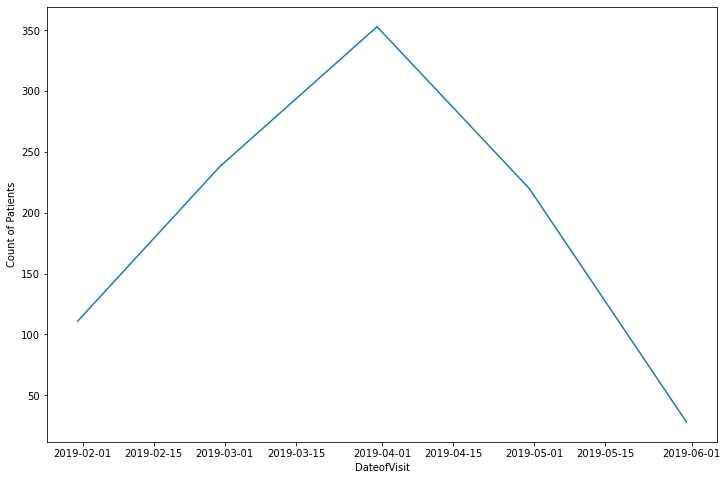

In [6]:
#82 Plot a trend chart to show the flow of patients

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("HospitalDatabase .xlsx", "AmbulatoryVisits")
df1=df.resample(rule='M', on='DateofVisit')['PatientMRN'].count().reset_index(name = 'Count of Patients')
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='DateofVisit', y='Count of Patients', data=df1)


In [7]:
#83 Percentage of patients expired of all the patients visited

df=pd.read_excel("HospitalDatabase .xlsx", "Discharges")
ef = pd.read_excel("HospitalDatabase .xlsx", "Patients")
df1 = (df[df['DischargeDisposition']=='Expired'])
expired = (df1.loc[:, ["PatientID"]])
expired_count = expired.count()
all_patient = len((np.unique(ef["PatientID"])).tolist())
#all_patient
percent = round((expired_count[0]/all_patient)*100)
print("Out of all the people visited, %s percentage of people are expired" %percent)
count_service = (df1["Service"]).value_counts()
print(count_service)


Out of all the people visited, 11 percentage of people are expired
ICU                 29
Neurology           27
General Medicine    18
Cardiology          15
Hospitalist         10
Orthopeadics         5
Name: Service, dtype: int64


Text(0.5, 1.0, 'Neurology : Count of death vs Primary Diagnosis ')

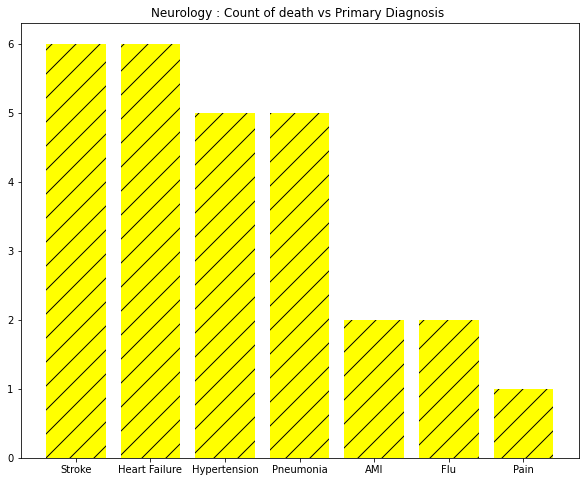

In [8]:
#84 Display the count of expired patients in Neurology service based on primary diagnosis

df=pd.read_excel("HospitalDatabase .xlsx", "Discharges")
ef = pd.read_excel("HospitalDatabase .xlsx", "Patients")
df1 = (df[df['DischargeDisposition']=='Expired'])
expired = (df1.loc[:, ["PatientID"]])
expired_count = expired.count()
service = (df1[df1["Service"]=='Neurology'])
diag = (service["PrimaryDiagnosis"].value_counts()).to_dict()
diagnosis = list(diag.keys())
count_diag = list(diag.values())
plt.figure(figsize=(10,8))
plt.bar(diagnosis,count_diag, color ='yellow',hatch ='/')
plt.title("Neurology : Count of death vs Primary Diagnosis ")